In [1]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt
%matplotlib inline
# plt.rcParams['figure.dpi'] = 200
cv.__version__

'4.1.0'

In [2]:
# utils

def resize(image, width = None, height = None, inter = cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

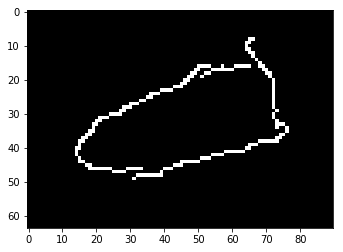

In [3]:
image = cv.imread('../assets/images/aedes_template.jpg', 0)
img = cv.medianBlur(image, 5)

img_threshold = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

template = cv.Canny(img, 100, 260)
(tH, tW) = template.shape[:2]

plt.imshow(template, cmap = 'gray')

(2462754.25, (71, 28), 1.0)
(2462754.25, (71, 28), 1.0)
(2544848.25, (310, 9), 1.0921501706484642)
(2544848.25, (310, 9), 1.0921501706484642)
(2544848.25, (310, 9), 1.0921501706484642)
(2544848.25, (310, 9), 1.0921501706484642)
(2544848.25, (310, 9), 1.0921501706484642)
(2544848.25, (310, 9), 1.0921501706484642)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)
(2691357.25, (185, 0), 1.509433962264151)


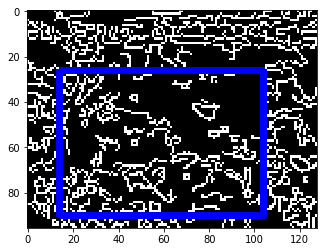

In [4]:
image = cv.imread('../assets/images/aedes1.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.medianBlur(gray, 5)
found = None

for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized = resize(blur, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])
    
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    
    edged = cv.Canny(resized, 100, 260)
    result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv.minMaxLoc(result)
    
    clone = np.dstack([edged, edged, edged])
    cv.rectangle(clone, 
                 (maxLoc[0], maxLoc[1]), 
                 (maxLoc[0] + tW, maxLoc[1] + tH),
                 (0, 0, 255),
                 2)

    plt.imshow(clone, cmap = 'gray')
    
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
    
    print(found)

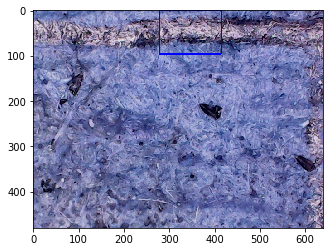

In [5]:
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
cv.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

plt.imshow(image)